In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import Regression_tasks
import EDA_Visualization
import MRI_File_Conversion
import Clean_Data
import Feature_Selection
import Feature_Extraction
import re
import glob
import os
import nibabel as nb
import nilearn as nl
from nibabel.gifti import gifti
import nipype as nip
from nipype.interfaces import cat12, matlab, spm, freesurfer
import imp
imp.reload(EDA_Visualization)
imp.reload(MRI_File_Conversion)
imp.reload(Regression_tasks)
imp.reload(Clean_Data)
imp.reload(Feature_Selection)
imp.reload(Feature_Extraction)


Package import done
Package import done


<module 'Feature_Extraction' from '/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging_Project/Code/Brain_Age_Estimation/Feature_Extraction.py'>

In [56]:
###### load the data files #######

CAT12_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM"
IXI_data_dir = os.path.join(CAT12_data_dir, "IXI_T1w/")
BraTS_data_dir = os.path.join(CAT12_data_dir, "BraTS_T1w_2020/")
ICBM_data_dir = os.path.join(CAT12_data_dir, "ICBM_T1w/")
OASIS2_data_dir = os.path.join(CAT12_data_dir,"OASIS2_T1w_HC/")
ADNI_data_dir = os.path.join(CAT12_data_dir, "ADNI_T1w_CN/")
ADNI_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/ADNI/Metadata"

########## brain tumor project data ##############
BT_proj_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging_Project/Brain_tumor_project/"
figures_path = os.path.join(BT_proj_data_dir, "Brain_tumor_results")

Prep_CAT12_Reg_Data_Dir = os.path.join(BT_proj_data_dir, "Prep_CAT12_Dataset/")
HC_data_dir = Prep_CAT12_Reg_Data_Dir + "/HC_MRI_Reg_Features/"
BT_data_dir = Prep_CAT12_Reg_Data_Dir + "/BT_MRI_Reg_Features/"
HC_vox_data_dir = Prep_CAT12_Reg_Data_Dir + "/HC_Vox_Features/"
Reg_results_dir = figures_path + "Regression_results/"

######## metadata files ##############
ixi_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/IXI/IXI_participants.xls"
ICBM_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/ICBM/T1w_MRI_HC_Summary_ICBM.csv"
OASIS2_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/OASIS2_T1w_HC/OASIS2_HC_Subj_Metadata.csv"
ADNI_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/ADNI/ADNI_CN_Only/Subject_Metadata_ADNI_CN_Only.csv"
BraTS_metadata_file = BraTS_data_dir + "survival_info.csv"
HC_metadata_file = os.path.join(BT_proj_data_dir, "Participants_demographics_data/Demographics_HC.csv")

ADNI_fMRI_Metadata_file = os.path.join(ADNI_dir, "ADNI_fMRI_6_18_2023.csv" )
ADNI_MRI_Metadata_file = os.path.join(ADNI_dir, "ADNI_sMRI_6_19_2023.csv" )
ADNI_PET_Metadata_file = os.path.join(ADNI_dir, "ADNI_PET_6_19_2023.csv" )
ADNI_Multimodal_Metadata_file = os.path.join(ADNI_dir, "ADNI_Multimodal_6_19_2023.csv" )

########## MRI visualization surface files ##########
OASIS_surf_cent = os.path.join(OASIS2_data_dir,"surf", "lh.central.OAS2_0004_MR1.gii")
OASIS_surf_pial = os.path.join(OASIS2_data_dir,"surf", "lh.pial.OAS2_0004_MR1.gii")
OASIS_surf_sphere = os.path.join(OASIS2_data_dir,"surf", "lh.sphere.OAS2_0004_MR1.gii")
OASIS_surf_thick = os.path.join(OASIS2_data_dir,"surf", "lh.thickness.OAS2_0062_MR1")

OASIS_mwp1_file = os.path.join(OASIS2_data_dir,"mri", "mwp1OAS2_0135_MR1.nii")
ADNI_mwp1_file = os.path.join(ADNI_data_dir,"mri", "mwp1ADNI_007_S_0070_T1w.nii")
IXI_mwp1_file = os.path.join(IXI_data_dir,"mri", "mwp1IXI039-HH-1261-T1.nii")
ICBM_mwp1_file = os.path.join(ICBM_data_dir,"mri", "mwp1ICBM_MNI_0138_MRI_T1-FFE_br_20050121155947068_S6800_I2396.nii")

test_surf_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/Test_surface"
thick_in_file = os.path.join(test_surf_dir, "rh.thickness.ADNI_002_S_0295_T1w")
depth_in_file = os.path.join(test_surf_dir, "rh.depth.ADNI_002_S_0413_T1w")
gyrf_in_file = os.path.join(test_surf_dir, "rh.gyrification.ADNI_002_S_0413_T1w")

thick_out_file = os.path.join(test_surf_dir, "rh.thickness.ADNI_941_S_1202_T1w.nii.gz")

########## voxel intensity np array files ############
Vox_GM_IXI_file = os.path.join(IXI_data_dir, "Voxel_Features", "IXI_Vox_CAT12_505x1749352.npy")
Vox_GM_ADNI_file = os.path.join(ADNI_data_dir, "Voxel_Features", "ADNI_Vox_CAT12_198x1749352.npy")
Vox_GM_OASIS_file = os.path.join(OASIS2_data_dir, "Voxel_Features", "OASIS_Vox_CAT12_54x1749352.npy")
Vox_GM_ICBM_file = os.path.join(ICBM_data_dir, "Voxel_Features", "ICBM_Vox_CAT12_68x1749352.npy")
Vox_HC_file = os.path.join(HC_vox_data_dir, "PCA_HC_Comb_Vox_CAT12_825x750.npy")

######### model weights ###########################


In [228]:
# Vox_HC_arr = pd.DataFrame(np.load(Vox_HC_file, allow_pickle=True))
# HC_metadata = pd.read_csv(HC_metadata_file)
# Vox_HC_arr = Vox_HC_arr.rename(columns={Vox_HC_arr.columns[0]: "Subject_ID"})


# HC_metadata = replaceLabels(HC_metadata)
# HC_metadata.iloc[:,1:].to_csv(HC_metadata_file)
# Vox_HC_df = HC_metadata.merge(Vox_HC_arr, left_on="Subject_ID", right_on="Subject_ID", how="inner")
# X = Vox_HC_df.iloc[:,5:]
# Y = Vox_HC_df.loc[:,"Age"]

# Reg_HC_arr = pd.read_csv(os.path.join(HC_data_dir,"Vol_Thick_Features", "Prep_CAT12_Vol_Thick_QC_757x798.csv"))
# Reg_HC_arr = Reg_HC_arr.rename(columns={Reg_HC_arr.columns[1]: "Subject_ID"})
# Reg_HC_df = HC_metadata.merge(Reg_HC_arr.iloc[:,1:], left_on="Subject_ID", right_on="Subject_ID", how="inner")

# Reg_Vox_HC_df = Reg_Vox_HC_df.drop(columns=Reg_Vox_HC_df.columns[[802,803]])

# Vox_HC_df = Vox_HC_df.iloc[:,1:]
# Reg_HC_df = Reg_HC_df.iloc[:,:798]
# Reg_HC_arr = Clean_Data.replaceLabels(Reg_HC_arr,"ADNI")
# Reg_Vox_HC_df = Reg_HC_df.merge(Vox_HC_df.iloc[:,np.concatenate((np.arange(1),np.arange(4,754)))], left_on="Subject_ID", right_on="Subject_ID", how="inner")
X = Reg_Vox_HC_df.iloc[:,5:]
Y = Reg_Vox_HC_df.loc[:,"Age_x"]
# X

In [236]:

X.columns = range(X.shape[1])
X

,0,1,2,3,4,5,6,7,8,9,...,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546
0,8.1299,0.1506,4.0073,0.0506,0.5702,1.6942,3.1552,5.8018,8.5996,6.5770,...,28.092222,-3.698385,-29.239602,23.826709,8.465008,-19.862503,11.375851,39.557671,-28.842322,-27.531995
1,8.5066,0.2019,2.9954,0.0735,0.5860,1.5917,3.4097,6.6581,10.1425,5.7724,...,1.535221,4.388431,-4.196105,-6.055738,6.322694,-2.030411,-3.252421,5.800698,-4.883173,0.574978
2,8.0357,0.1788,3.1005,0.0622,0.6211,1.8569,3.4943,6.7789,9.9711,7.1484,...,-5.24633,-3.300636,14.014358,7.5124,-5.987533,-5.469535,-12.376802,4.436931,1.761352,-4.305743
3,7.0129,0.2982,3.1131,0.0537,0.6855,1.6250,3.0751,5.7999,9.5006,5.1774,...,-32.869185,-57.687696,-40.750435,-4.768056,29.834414,24.634653,-45.458035,25.430738,-14.128797,17.518322
4,9.0264,0.2663,2.9218,0.0678,0.8704,2.0242,3.4197,6.2596,9.5329,7.2254,...,-1.80942,-53.903019,8.034006,2.312261,19.229459,17.954106,-3.023029,29.881444,-9.897401,-14.418597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,7.9011,0.3095,4.2583,0.0588,0.6185,1.7752,3.2691,7.2334,9.9377,8.0870,...,6.847736,15.087429,-1.281583,13.386048,2.568375,-1.90341,-6.751345,-14.409964,-20.361026,-13.952761
750,5.8181,0.2333,2.3599,0.0655,0.5563,1.1002,1.9576,3.0365,4.5963,2.9151,...,3.726019,1.598355,-2.12773,-2.894861,2.911578,1.12115,8.646286,-4.233581,0.552834,-2.03694
751,8.9646,0.3857,3.6090,0.0936,0.7283,1.2198,2.2970,4.1012,6.6796,4.3500,...,-3.1077,2.32149,4.519859,-2.513075,-0.493868,2.039659,0.104261,1.043202,4.108958,2.976314
752,0.9586,0.1377,2.3625,0.0008,0.2215,0.3146,0.7831,1.2824,3.1548,2.9637,...,0.009417,0.175196,0.024279,-0.079023,-0.09338,-0.068569,-0.022063,0.083619,-0.03564,0.106318


In [31]:
# Vox_GM_IXI = Clean_Data.Load_Voxel_Features(IXI_data_dir, "IXI", "GM", sav_loc=True)
# Vox_GM_ADNI = Clean_Data.Load_Voxel_Features(ADNI_data_dir, "ADNI", "GM", sav_loc=True)
# Vox_GM_OASIS = Clean_Data.Load_Voxel_Features(OASIS2_data_dir, "OASIS", "GM", sav_loc=True)
# Vox_GM_ICBM = Clean_Data.Load_Voxel_Features(ICBM_data_dir, "ICBM", "GM", sav_loc=True)

# ADNI_metadata = pd.read_csv(ADNI_metadata_file)
# Vox_GM_ICBM_QC = Clean_Data.Perform_CAT12_QC(Vox_GM_ICBM, "", "ICBM", 73, "Voxel")

In [ ]:
# convert to numpy array and save

IXI_Thick, IXI_Vol, IXI_Thick_Vol = Clean_Data.Rem_ROI_Features("IXI", IXI_data_dir)
IXI_Metadata = pd.read_excel(ixi_metadata_file)

IXI_Thick = Clean_Data.Get_IXI_Labels(IXI_Thick, IXI_Metadata)
# BraTS_Metadata = pd.read_csv(BraTS_metadata_file)
IXI_Vol = Clean_Data.Get_IXI_Labels(IXI_Vol, IXI_Metadata)
# BraTS_Metadata = pd.read_csv(BraTS_metadata_file)
IXI_Thick_Vol = Clean_Data.Get_IXI_Labels(IXI_Thick_Vol, IXI_Metadata)

# Clean_CAT12_Data.Save_To_Local(BraTS_Thick, "BraTS", BraTS_data_dir, "thickness")
# # Clean_CAT12_Data.Save_To_Local(BraTS_Vol, "BraTS", ADNI_data_dir, "volume")
# Clean_CAT12_Data.Save_To_Local(BraTS_Thick_Vol, "BraTS", BraTS_data_dir, "combined")

# BraTS_Thick_QC = Clean_CAT12_Data.Perform_CAT12_QC(BraTS_Thick, BraTS_data_dir, "BraTS", 73, "Thick")
# BraTS_Vol_QC = Clean_CAT12_Data.Perform_CAT12_QC(BraTS_Vol, BraTS_data_dir, "BraTS", 73, "Vol")
# BraTS_Thick_Vol_QC = Clean_CAT12_Data.Perform_CAT12_QC(BraTS_Thick_Vol, BraTS_data_dir, "BraTS", 73 , "Thick_Vol")

    


In [237]:
# HC_Thick_Vol = pd.read_csv(os.path.join(HC_data_dir,"Vol_Thick_Features", "Prep_CAT12_Vol_Thick_QC_757x798.csv"))
# ADNI_Thick_Vol = pd.read_csv(os.path.join(ADNI_data_dir,"ADNI_CAT12_QC", "Prep_CAT12_Thick_Vol_ADNI_QC_195x798.csv"))

# X= ADNI_Thick_Vol.iloc[:,2:799]
# Y = ADNI_Thick_Vol.iloc[:,800]

sc = Regression_tasks.StandardScaler()
scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = Regression_tasks.train_test_split(scaled, Y, test_size=0.2, random_state=1)
print("X_train size: ", X_train.shape, "\nX_test size: ", X_test.shape)

X_train size:  (603, 1547) 
X_test size:  (151, 1547)


In [ ]:
### applying some feature selection criteria 
# feat_metrics = Feature_Selection.Comp_Feat_Sel_Metrics(np.array(X),np.array(Y)).transpose()
ids = feat_metrics.loc[((feat_metrics["Corr(xy)"]>0.5) | (feat_metrics["Corr(xy)"]<-0.5)) & (feat_metrics["Entropy(x)"]>0.1) & (feat_metrics["MI(xy)"]>0.3), :]
idss = list(ids.loc[:,"Id"])
X_train_s = X_train.iloc[:, idss]
X_test_s  = X_test.iloc[:, idss]

# X_train_s = X_train.iloc[:, idss]
# X_test_s  = X_test.iloc[:, idss]

# y_pred, result = Regression_tasks.kFold_Cross_Val(X_train, Y_train, "GLM_Normal" , "Random", "CAT12 Vol Thick", 10)
y_pred, result, model = Regression_tasks.GLM_normal(X_train_s, Y_train, X_test_s, Y_test, "CAT12 Vol Thick")
result.sort_index(ascending=False).head(15)

In [266]:
# X= HC_Thick_Vol.iloc[:,2:799]
# Y = HC_Thick_Vol.iloc[:,800]

# sc = Regression_tasks.StandardScaler()
# X = pd.DataFrame(sc.fit_transform(X))

# GM_vol_indexes = np.concatenate((np.arange(53,105), np.arange(237,371), np.arange(505,533), np.arange(561,580)))
# WM_vol_indexes = np.concatenate((np.arange(1,53), np.arange(371,505), np.arange(533,561)))
# CSF_vol_indexes = np.arange(105,237)
# Cort_thick_indexes = np.arange(581,797)

# for i in range(1,50):
X_train, X_test, Y_train, Y_test = Regression_tasks.train_test_split(scaled, Y, test_size=0.2)

# GM_vol_train = X_train.iloc[:, GM_vol_indexes]
# GM_vol_test = X_test.iloc[:, GM_vol_indexes]
# GM_vol_BT = BT_Thick_Vol.iloc[:, GM_vol_indexes]

# WM_vol_test = X_test.iloc[:, WM_vol_indexes]
# WM_vol_train = X_train.iloc[:, WM_vol_indexes]
# WM_vol_BT = BT_Thick_Vol.iloc[:, WM_vol_indexes]

# CSF_vol_test = X_test.iloc[:, CSF_vol_indexes]
# CSF_vol_train = X_train.iloc[:, CSF_vol_indexes]
# CSF_vol_BT = BT_Thick_Vol.iloc[:, CSF_vol_indexes]

# Cort_thick_test = X_test.iloc[:, Cort_thick_indexes]
# Cort_thick_train = X_train.iloc[:, Cort_thick_indexes]
# Cort_thick_BT = BT_Thick_Vol.iloc[:, Cort_thick_indexes]

# Y_pred, result = Regression_tasks.kFold_Cross_Val(X_train, Y_train, "GLM_Normal", "Stratified", "All", 10)
y_pred, result, model = Regression_tasks.GLM_normal(X_train, Y_train, X_test, Y_test, "All")
result.sort_index(ascending=False).head(15)

GLM_Normal started running
GLM_Normal finished running


,Dataset,Model,MAE,RMSE,MSE,R_sq,Time,Set
28,All,GLM_Normal,5.11,6.59,43.43,0.89,2.873633,Test
27,All,GLM_Normal,5.21,7.34,53.82,0.85,2.573487,Test
26,All,GLM_Normal,5.63,7.18,51.52,0.86,2.522891,Test
25,All,GLM_Normal,5.30,7.53,56.70,0.85,2.796552,Test
24,All,GLM_Normal,5.12,6.34,40.24,0.89,3.026306,Test
23,All,GLM_Normal,5.26,7.33,53.80,0.85,3.031868,Test
22,All,GLM_Normal,5.48,7.12,50.65,0.87,2.624980,Test
21,All,GLM_Normal,5.66,7.45,55.49,0.86,2.279222,Test
20,All,GLM_Normal,5.28,7.26,52.75,0.86,2.875594,Test
19,All,GLM_Normal,5.20,6.97,48.60,0.89,2.915741,Test


In [44]:
###### save the train-test sets ######
np.save(Prep_CAT12_Reg_Data_Dir+"X_train", X_train)
np.save(Prep_CAT12_Reg_Data_Dir+"X_test", X_test)
np.save(Prep_CAT12_Reg_Data_Dir+"Y_train", Y_train)
np.save(Prep_CAT12_Reg_Data_Dir+"Y_test", Y_test)

In [272]:
############### test the model on healthy test set ##################
from sklearn import linear_model

# pipeline = make_pipeline(MLPRegressor(activation= 'tanh', alpha=0.0008, hidden_layer_sizes=(150, 100, 40), learning_rate= 'adaptive', learning_rate_init=0.01) )
pipeline = Regression_tasks.make_pipeline( linear_model.TweedieRegressor(alpha=0.3))
# pipeline = make_pipeline( linear_model.PoissonRegressor(alpha=20))

# pipeline = Regression_tasks.make_pipeline( linear_model.Ridge(alpha=200))
# pipeline = make_pipeline( linear_model.BayesianRidge(alpha_1=0.001, lambda_1=0.001))


mod = pipeline.fit(X_train, Y_train)

Y_pred = mod.predict(X_test)

print(Regression_tasks.mean_absolute_error(Y_pred, Y_test))
print(Regression_tasks.math.sqrt(Regression_tasks.mean_squared_error(Y_pred, Y_test)))
print(Regression_tasks.r2_score(Y_pred, Y_test))



5.262637175724608
6.754383976141561
0.8673229105152345


In [914]:
############ test the model on clinical brain tumor patients ####################
BT_Thick_Vol_df = pd.read_csv(os.path.join(BT_data_dir,"Vol_Thick_Features", "Prep_CAT12_Thick_Vol_BraTS_QC_60x797.csv"))

# Y_test_bt = BT_Thick_Vol_df.loc[:,"Age"]
# sc = StandardScaler()
# BT_Thick_Vol = pd.DataFrame(sc.fit_transform(BT_Thick_Vol_df.iloc[:,2:799]))

Y_pred_bt = mlp.predict(B)


print(Regression_tasks.mean_absolute_error(Y_pred_bt, Y_test_bt))
print(math.sqrt(Regression_tasks.mean_squared_error(Y_pred_bt, Y_test_bt)))
print(Regression_tasks.r2_score(Y_pred_bt, Y_test_bt))

16.668093275854364
19.837272693425398
-1.7547353217500725


Results visualization

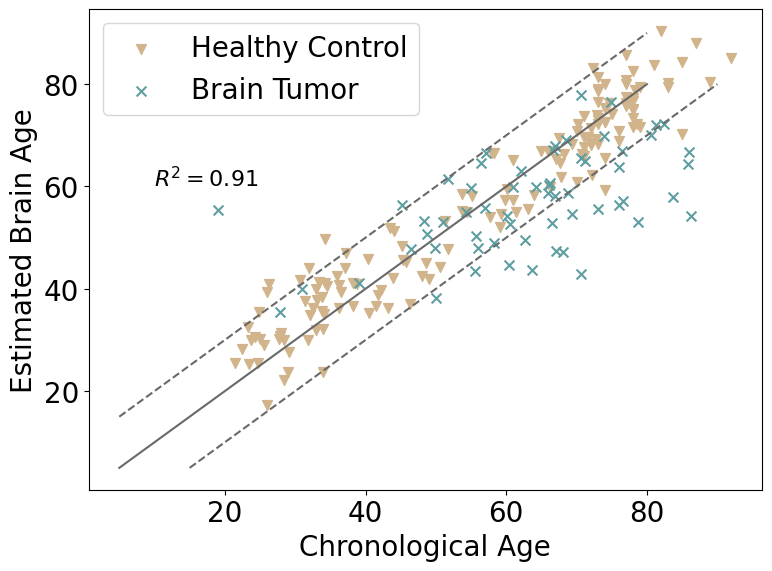

In [696]:
EDA_Visualization.Plot_true_vs_pred_grouped(Y_pred, Y_test, Y_pred_bt, Y_test_bt, "", 0.91, figures_path+"True_vs_pred_age_scatter_plots/HC_vs_BT_")

<Figure size 800x600 with 0 Axes>

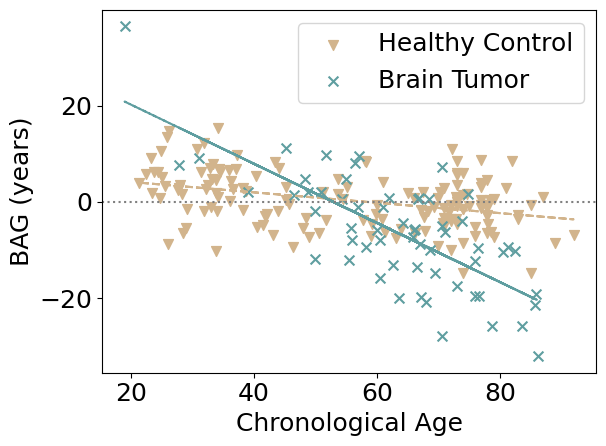

In [791]:
EDA_Visualization.Plot_true_vs_BAG_grouped(Y_pred, Y_test, Y_pred_bt, Y_test_bt, "", figures_path+"True_vs_pred_age_scatter_plots/HC_vs_BT_")

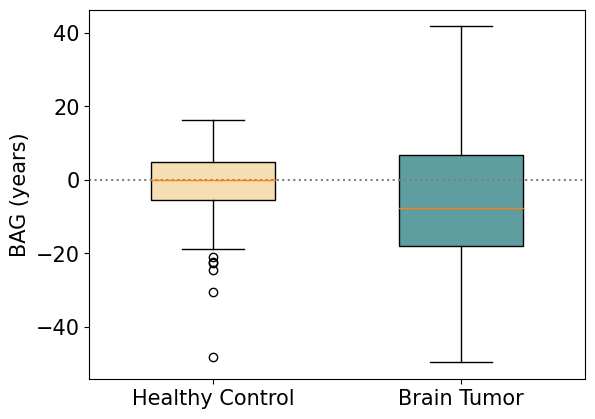

In [946]:
EDA_Visualization.Box_Plot_Age_Gap(Y_pred, Y_test, Y_pred_bt, Y_test_bt, figures_path+"Brain_age_gap_box_plots/HC_vs_BT_")

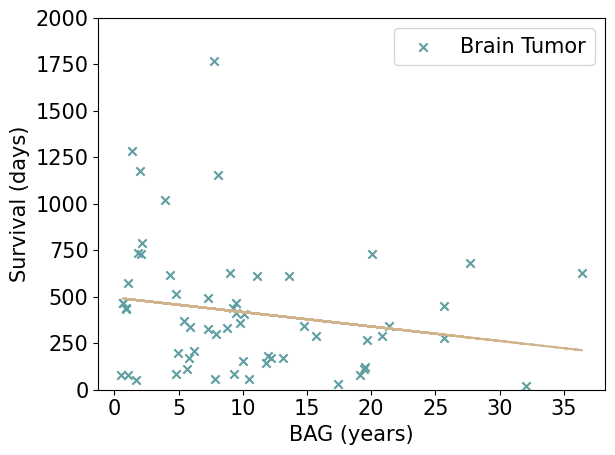

In [852]:
# Survival_days = BT_Thick_Vol_df.loc[:,"Survival_days"]
# BAG_bt = abs(Y_pred_bt-np.array(Y_test_bt).reshape(1,-1)).transpose()

EDA_Visualization.Plot_Survival_vs_BAG(Survival_days, BAG_bt, figures_path+"True_vs_pred_age_scatter_plots/BT_")

In [831]:
np.corrcoef(BAG_bt, Survival_days.astype(int))

array([[ 1.        , -0.18851265],
       [-0.18851265,  1.        ]])

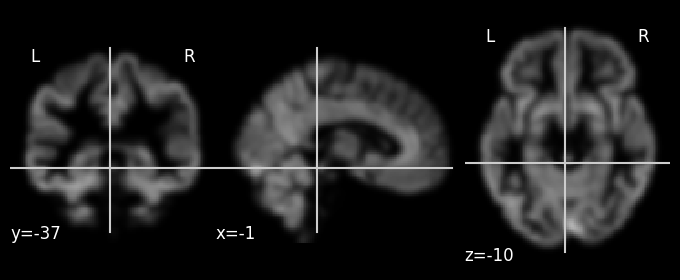

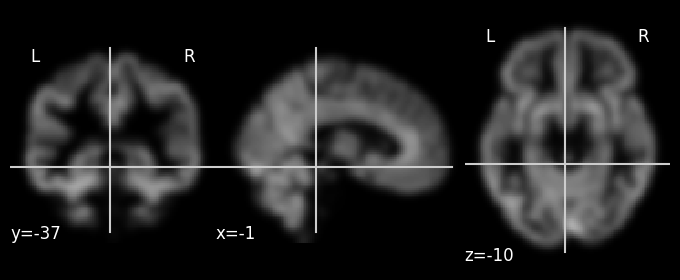

In [61]:
smoothed_file_6mm = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/Test_surface/s6mwp1ADNI_002_S_0295_T1w.nii"
IXI_mwp1_file

smoothed_img_6mm = nb.load(smoothed_file_6mm)
img = nb.load(IXI_mwp1_file)
nl.plotting.plot_anat(smoothed_file_6mm)
nl.plotting.plot_anat(smoothed_img)


[22, 29, 36, 42, 49, 56, 63, 69, 76, 83] [0 1 2 3 4 5 6 7 8 9]


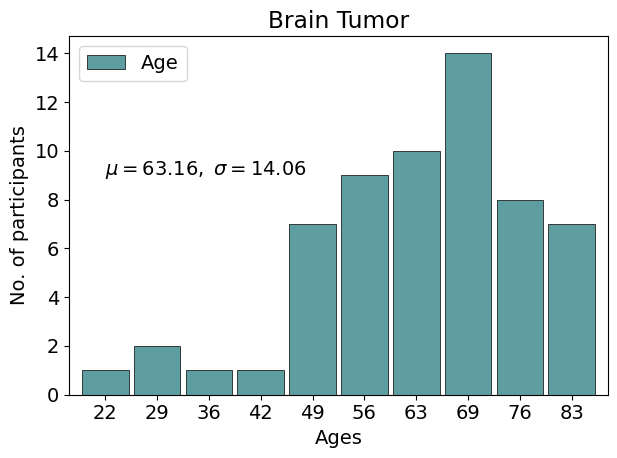

In [ ]:
# IXI_Vol_Thick = pd.read_csv(IXI_data_dir+"SBM_thickness/Prep_CAT12_Vol_Thick_IXI_488x800.csv")

# IXI_metadata= pd.DataFrame({"Subject_ID":dataMatrix.loc[:,"names"] ,"Age":dataMatrix.loc[:,"Age"], "Sex":dataMatrix.loc[:,"SEX_ID(1=m,2=f)"]})
# OASIS2_metadata = pd.read_csv(OASIS2_data_dir+"OASIS2_VBM_volume/Prep_CAT12_Vol_OASIS2_QC_IQR_73_51x581.csv").loc[:,["names","Age","M/F"]]
# ICBM_metadata = pd.read_csv(ICBM_data_dir+"ICBM_VBM_volume/Prep_CAT12_Vol_ICBM_QC_28x581.csv").loc[:,["names", "Age","Gender"]]
# BraTS_Ages = pd.read_csv(BraTS_data_dir+"BraTS_VBM_volume/Prep_CAT12_Vol_BraTS_QC_66x580.csv").loc[:,"Age"]

# OASIS2_metadata.columns = ["Subject_ID", "Age", "Sex"]
# ICBM_metadata.columns = ["Subject_ID", "Age", "Sex"]

# IXI_Thick_Vol.loc[IXI_Thick_Vol["Gender"]==2, "Gender"] = "F"
# IXI_Thick_Vol.loc[IXI_Thick_Vol["Gender"]==1, "Gender"] = "M"

# np.save(HC_data_dir+"/Vol_Thick_Features/Prep_CAT12_Vol_Thick_IXI_QC_IQR_73_483x798.npy", HC_Thick_Vol)

BraTS_Age = pd.DataFrame({"Age":BT_Vol_Thick.loc[:,"Age"]})
# # Visualization_EDA.Plot_Age_Hist(OASIS2_Ages, 10, 62,92, "OASIS-2", labels=True, path= figures_path+"Age_gender_dist/HC_OASIS2_")
EDA_Visualization.Plot_Age_Hist(BraTS_Age, "Brain Tumor", 0, figures_path+"Age_distribution_histograms/")
# # ICBM_Age_Gend = pd.DataFrame({"Age":ICBM_metadata.loc[:,"Age"], "Sex":ICBM_metadata.loc[:,"Gender"]})


# EDA_Visualization.Plot_Age_Gend_Hist(HC_Thick_Vol.loc[:,["Gender", "Age"]], "Healthy Controls", 1, 150, figures_path+"Age_distribution_histograms/")

# BT_Vol_Thick.pivot_table("Age", columns="Gender" ,aggfunc='count')
# BT_Vol_Thick.loc[:,"Age"].mean()
# BT_Vol_Thick = pd.read_csv(BT_data_dir + "Vol_Thick_Features/Prep_CAT12_Thick_Vol_BraTS_QC_60x797.csv")

# HC_Metadata = pd.concat([IXI_metadata, OASIS2_metadata, ICBM_metadata], ignore_index=True)

# HC_Metadata.to_csv(demographics_path+"Demographics_HC.csv")

